<a href="https://www.kaggle.com/code/mikedelong/python-eda-lineplots-and-maps?scriptVersionId=140397205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from glob import glob

df = pd.concat(objs=[pd.read_csv(filepath_or_buffer=input_file, 
                                 parse_dates=['started_at', 'ended_at']
                                ) for input_file in glob('/kaggle/input/bike-share/*.csv')])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779444 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 617.3+ MB


In [2]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

In [3]:
df.nunique()

ride_id               5779444
rideable_type               3
started_at            4862473
ended_at              4875344
start_station_name       1820
start_station_id         1498
end_station_name         1821
end_station_id           1498
start_lat              772920
start_lng              730231
end_lat                 13720
end_lng                 13834
member_casual               2
dtype: int64

In [4]:
df.sample(n=10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
126775,910B6789C803AB35,electric_bike,2023-06-16 18:36:04,2023-06-16 18:45:01,Halsted St & Clybourn Ave,331,Wells St & Hubbard St,TA1307000151,41.909670,-87.648142,41.889906,-87.634266,member
96657,F1199A78C8F99541,classic_bike,2022-12-08 19:23:08,2022-12-08 19:29:11,Clarendon Ave & Gordon Ter,13379,Halsted St & Roscoe St,TA1309000025,41.957867,-87.649505,41.943670,-87.648950,casual
148243,94A9D9A19DDEA375,electric_bike,2022-10-31 17:54:37,2022-10-31 17:58:37,State St & Chicago Ave,21544,Wells St & Hubbard St,TA1307000151,41.896684,-87.628656,41.889906,-87.634266,casual
50928,1F8FE8ED422F9FC0,docked_bike,2022-09-03 17:20:41,2022-09-03 18:42:26,Millennium Park,13008,Field Museum,13029,41.881032,-87.624084,41.865312,-87.617867,casual
512406,E76A59E97926A2DD,classic_bike,2022-07-04 11:19:48,2022-07-04 11:28:03,Museum of Science and Industry,KA1503000074,Kimbark Ave & 53rd St,TA1309000037,41.791728,-87.583945,41.799568,-87.594747,member
324371,C6633D65A7509D1D,classic_bike,2022-10-23 13:45:51,2022-10-23 14:34:30,Cannon Dr & Fullerton Ave,13124,Lakefront Trail & Wilson Ave,639,41.926756,-87.634429,41.965845,-87.645361,member
30932,597505FBE152ED6D,electric_bike,2023-04-27 17:44:54,2023-04-27 17:51:56,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Damen Ave & Cortland St,13133,41.901399,-87.677467,41.915983,-87.677335,member
419262,B7F96F94E5AAD980,electric_bike,2022-07-08 19:42:16,2022-07-08 19:49:21,Ashland Ave & Chicago Ave,13247,N Carpenter St & W Lake St,20251.0,41.895201,-87.667834,41.890000,-87.650000,casual
396323,4C4948719920C055,electric_bike,2022-08-13 11:16:51,2022-08-13 11:27:43,NaN,NaN,Wells St & Concord Ln,TA1308000050,41.890000,-87.640000,41.912133,-87.634656,member
782673,D7CE82CDC40313F3,electric_bike,2022-08-13 02:12:51,2022-08-13 02:29:14,LaSalle St & Washington St,13006,NaN,NaN,41.882623,-87.632709,41.890000,-87.630000,casual


Is there any information in the ride ID or can we drop it?

<Axes: >

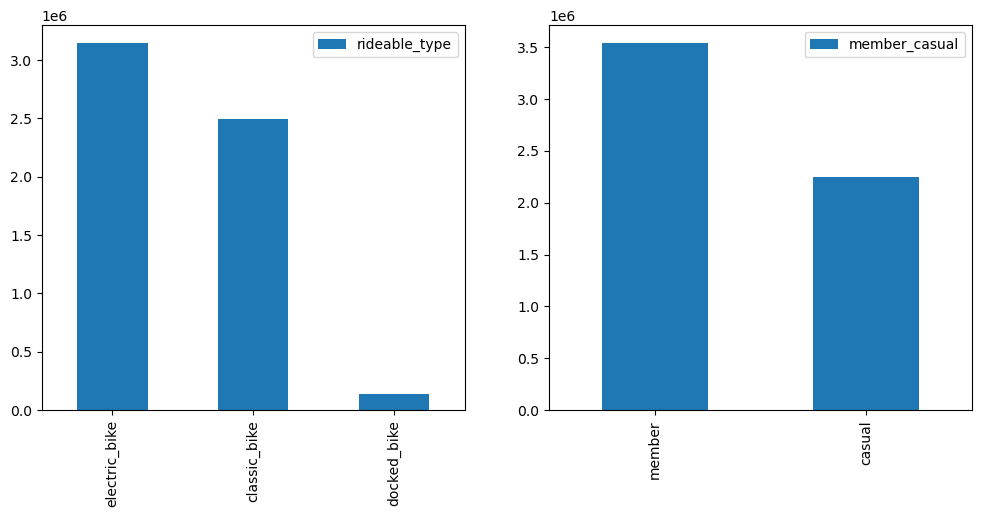

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=2,)
df['rideable_type'].value_counts().plot(ax=ax[0], kind='bar', legend=True)
df['member_casual'].value_counts().plot(ax=ax[1], kind='bar', legend=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='rideable_type', ylabel='member_casual'>

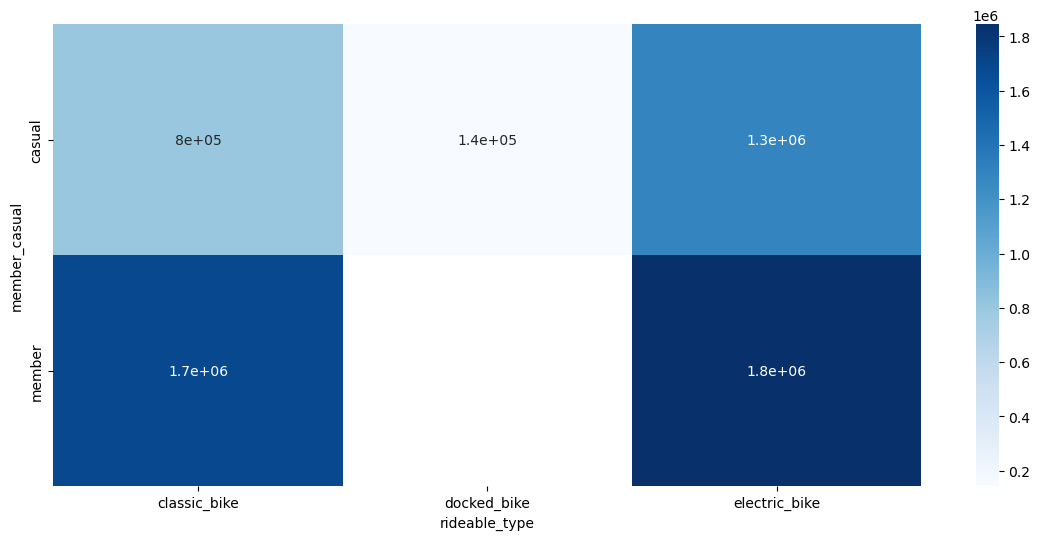

In [6]:
from seaborn import heatmap
_, ax = subplots(figsize=(14, 6),)
person_bike = ['rideable_type', 'member_casual']
heatmap(annot=True, cmap='Blues', data=pd.pivot_table(data=df[person_bike].groupby(person_bike).size().reset_index(),
                                          index=person_bike[1], columns=person_bike[0], values=0), square=False, )

These would probably look better as percentages instead of counts.

We expect the time variables to be really important here; let's try to make a time series plot of the whole dataset.

<Axes: xlabel='started_at'>

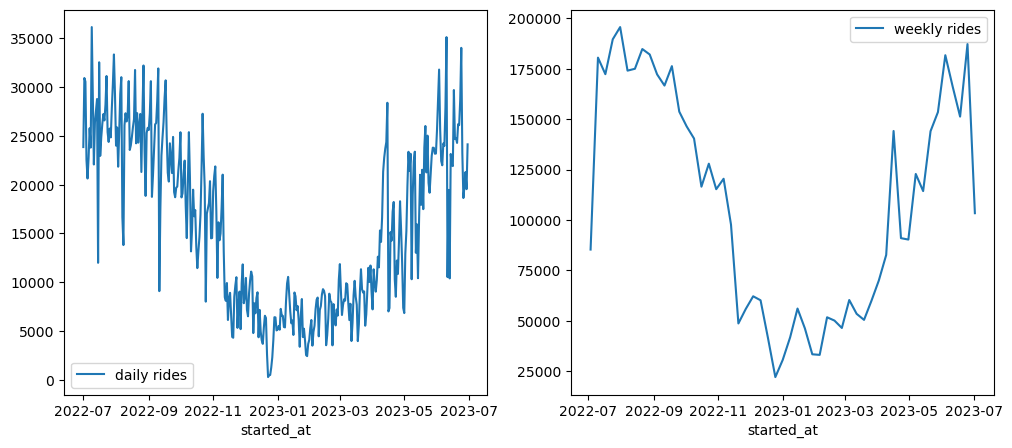

In [7]:
from seaborn import lineplot
_, ax=subplots(figsize=(12, 5), ncols=2, )
lineplot(ax=ax[0], data=df[['started_at']].groupby([pd.Grouper(key='started_at', freq='D'), ]).size().to_frame(name='daily rides'))
lineplot(ax=ax[1], data=df[['started_at']].groupby([pd.Grouper(key='started_at', freq='W'), ]).size().to_frame(name='weekly rides'))

We get the same basic shape for daily or weekly totals curves, both showing summer vs. winter seasonality, but the daily curve shows a lot more volatility.

<Axes: xlabel='started_day_of_week'>

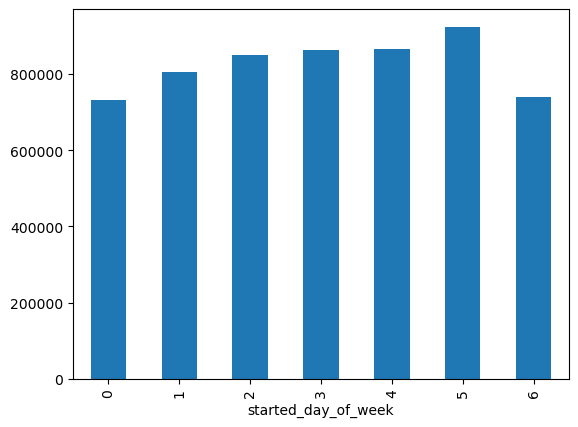

In [8]:
df['started_day_of_week'] = df['started_at'].dt.dayofweek
df[['started_day_of_week']].groupby('started_day_of_week',sort=True).size().plot(kind='bar')

Whatever is causing the volatility we see in the daily curve it isn't just the day of the week.

<Axes: xlabel='start_lng', ylabel='start_lat'>

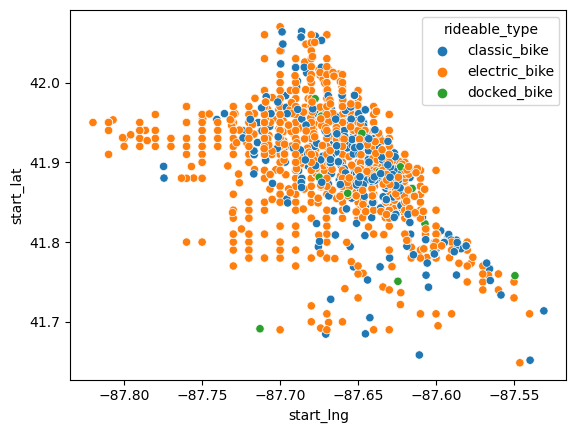

In [9]:
from seaborn import scatterplot
scatterplot(data=df.sample(n=10000), y='start_lat', x='start_lng', hue='rideable_type')

In [10]:
import plotly.graph_objects as go

sample_df = df.sample(n=50000)
fig = go.Figure(data=go.Scattergeo(
        lon = sample_df['start_lng'],
        lat = sample_df['start_lat'],
        text = sample_df['member_casual'],
        mode = 'markers',
#         marker_color = sample_df['rideable_type']
        ))

fig.update_layout(
        title = 'Bikes!',
        geo_scope='usa'
    )
fig.update_geos(fitbounds='locations')
fig.show()


Why do our two scatter plots look so different?